In [1]:
import sys
sys.path.append("/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/_scripts")

import os
from main.main import SVG2Plan

In [2]:
sv = SVG2Plan("amber_a_f01.svg", "amber_test")
sv.prepare_folder()
sv.read_in_svg()


In [3]:
sv.sv.domains

PartialLayout(shapes={'bedroom_1': <POLYGON ((3.22 3.29, 3.22 6.09, 0 6.09, 0 3.29, 3.22 3.29))>, 'kitchen': <POLYGON ((5.16 0, 5.16 2.24, 3.36 2.24, 3.36 0, 5.16 0))>, 'm_bath': <POLYGON ((7.62 4.79, 7.62 6.09, 5.3 6.09, 5.3 4.79, 7.62 4.79))>, 'm_bedroom': <POLYGON ((9.93 3.35, 9.93 6.09, 7.8 6.09, 7.8 3.35, 9.93 3.35))>, 'm_closet': <POLYGON ((9.93 2.69, 9.93 3.29, 8.93 3.29, 8.93 2.69, 9.93 2.69))>, 'bath': <POLYGON ((7.62 3.35, 7.62 4.58, 5.3 4.58, 5.3 3.35, 7.62 3.35))>, 'dining': <POLYGON ((8.78 0, 8.78 3.15, 5.42 3.15, 5.42 0, 8.78 0))>, 'transit_space': <POLYGON ((5.16 2.41, 5.16 4.19, 3.36 4.19, 3.36 2.41, 5.16 2.41))>, 'closet': <POLYGON ((9.93 -0.05, 9.93 2.36, 8.93 2.36, 8.93 -0.05, 9.93 -0.05))>, 'bedroom_2': <POLYGON ((3.22 0, 3.22 3.15, 0 3.15, 0 0, 3.22 0))>, 'laundry': <POLYGON ((4.98 4.31, 4.98 6.06, 3.38 6.06, 3.38 4.31, 4.98 4.31))>}, corners={'bedroom_1': DecimalCorners(x_left=Decimal('0.00'), x_right=Decimal('3.22'), y_bottom=Decimal('3.29'), y_top=Decimal('6.09'

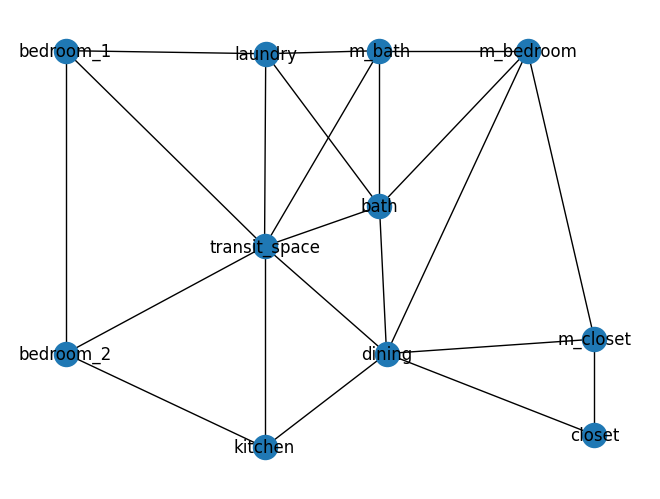

In [4]:
sv.ag.draw_graph()

In [5]:
sv.ag.domains.corners

{'bedroom_1': DecimalCorners(x_left=Decimal('0.00'), x_right=Decimal('3.22'), y_bottom=Decimal('3.29'), y_top=Decimal('6.09')),
 'kitchen': DecimalCorners(x_left=Decimal('3.36'), x_right=Decimal('5.16'), y_bottom=Decimal('0.00'), y_top=Decimal('2.24')),
 'm_bath': DecimalCorners(x_left=Decimal('5.30'), x_right=Decimal('7.62'), y_bottom=Decimal('4.79'), y_top=Decimal('6.09')),
 'm_bedroom': DecimalCorners(x_left=Decimal('7.80'), x_right=Decimal('9.93'), y_bottom=Decimal('3.35'), y_top=Decimal('6.09')),
 'm_closet': DecimalCorners(x_left=Decimal('8.93'), x_right=Decimal('9.93'), y_bottom=Decimal('2.69'), y_top=Decimal('3.29')),
 'bath': DecimalCorners(x_left=Decimal('5.30'), x_right=Decimal('7.62'), y_bottom=Decimal('3.35'), y_top=Decimal('4.58')),
 'dining': DecimalCorners(x_left=Decimal('5.42'), x_right=Decimal('8.78'), y_bottom=Decimal('0.00'), y_top=Decimal('3.15')),
 'transit_space': DecimalCorners(x_left=Decimal('3.36'), x_right=Decimal('5.16'), y_bottom=Decimal('2.41'), y_top=Deci

In [6]:
sv.plot_object_corners(sv.ag.layout_obj.corners, True)

In [7]:
sv.ag.G.nodes["m_bedroom"]

{'data': NeighborDirections(NORTH=[], SOUTH=['m_closet', 'dining'], EAST=[], WEST=['m_bath', 'bath'])}

In [8]:
sv.stack_rooms()

---m_bedroom has no western nbs that are unplaced
fpr bedroom_2, there is no west node
matching a south corner! NOTE this was changed for amber b!
kitchen, the east node of dining has not yet been placed. Creating a new x_left at 8.20
changing north node reference to 1. Number of unplaced nodes is 3
changing north node reference to 2. Number of unplaced nodes is 2
north node = dining. getting index 2 in ['bedroom_1', 'bedroom_2'] failed
changing north node reference to 3. Number of unplaced nodes is 2
north node = dining. getting index 3 in ['bedroom_1', 'bedroom_2'] failed
changing north node reference to 4. Number of unplaced nodes is 2
north node = dining. getting index 4 in ['bedroom_1', 'bedroom_2'] failed
changing north node reference to 5. Number of unplaced nodes is 2
ns_counter > 4 .. breaking


In [10]:
sv.lp.tracker

{0: ['bedroom_1', 'bedroom_2'],
 1: ['laundry', 'transit_space', 'kitchen'],
 2: ['m_bath', 'bath'],
 3: ['m_bedroom', 'dining']}

In [9]:
sv.plot_object_corners(sv.lp.layout.corners)

In [11]:
sv.fix_problems()

-- Unresolved Problems. Overlaps: 2. Holes: 1. Sideholes: 0
--iteration #1
curr problem = Problem(index=1, problem_type=ProblemType.OVERLAP, resolved=False, nbs=('stair_bottom', 'kitchen'), x_left=1.87)
Action(problem=((1, 'OVERLAP')), action_type=ActionType.PUSH, node=stair_bottom, distance=1.47)
-- Unresolved Problems. Overlaps: 1. Holes: 2. Sideholes: 0
problem resolved
indices: [2, 3, 4]
next problem = Problem(index=4, problem_type=ProblemType.HOLE, resolved=False, nbs=['kitchen', 'stair_bottom', 'wic', 'transit_1'], x_left=1.87)
--iteration #2
curr problem = Problem(index=4, problem_type=ProblemType.HOLE, resolved=False, nbs=['kitchen', 'stair_bottom', 'wic', 'transit_1'], x_left=1.87)
Action(problem=((4, 'HOLE')), action_type=ActionType.STRETCH, node=wic, distance=1.47)
-- Unresolved Problems. Overlaps: 2. Holes: 0. Sideholes: 0
problem resolved
indices: [2, 5]
next problem = Problem(index=5, problem_type=ProblemType.OVERLAP, resolved=False, nbs=('wic', 'transit_1'), x_left=1.87)

In [12]:
sv.plot_object_corners(sv.sl.layout.corners)